# 1 Imports

In [1]:
# Use seaborn for pairplot.
!pip install -q seaborn

import matplotlib.pyplot as plt
import seaborn as sns


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.9 -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split


print(tf.__version__)

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

2.11.0


# 2 Prepare Dataset

In [3]:
dataset = pd.read_csv('./averageddataset.csv')

X = dataset.drop(['Mouse x', 'Mouse y'], axis=1)
Y = dataset.loc[:,['Mouse x', 'Mouse y']]

# Split dataset to training and testing sets by 80:20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

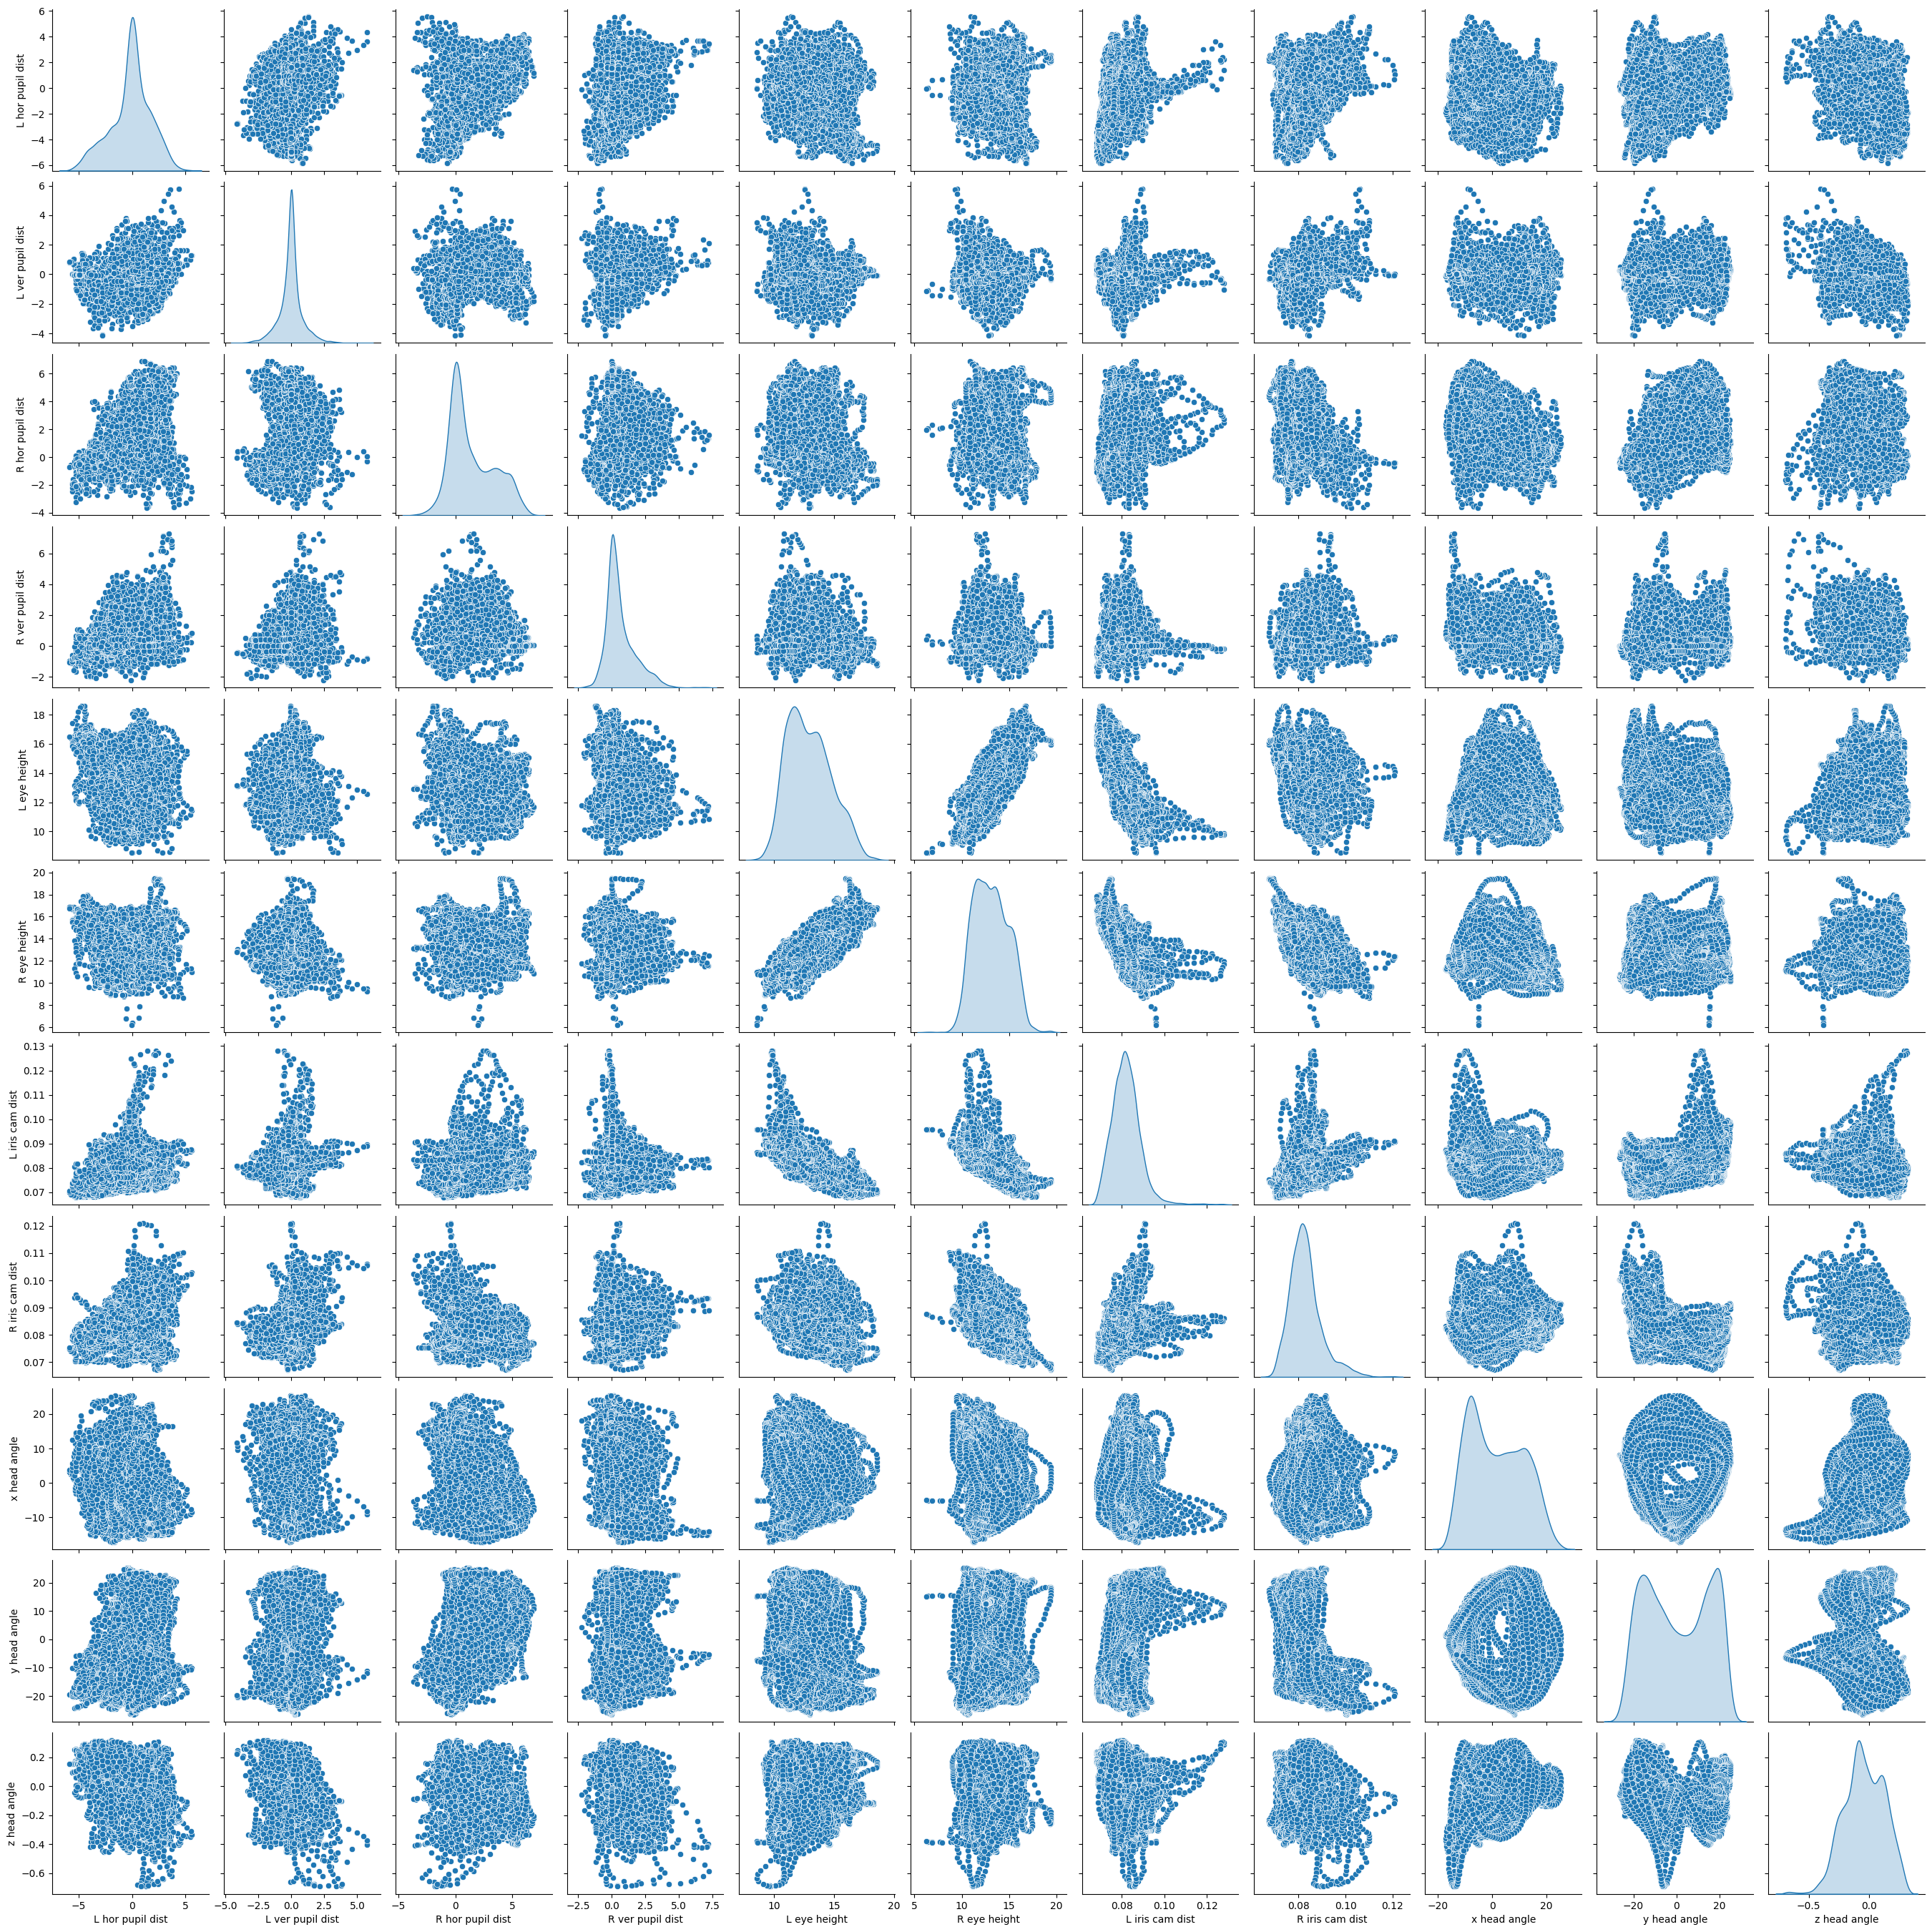

In [4]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

sns.pairplot(X, diag_kind='kde')

# Model Compiling

In [26]:
X_train_normalised = layers.Normalization(axis=-1)
X_train_normalised.adapt(np.array(X_train))

models = [keras.Sequential([
    X_train_normalised,
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(2)
])
          
         ]

histories = []
for i,model in enumerate(models):
    model.compile(loss='mean_squared_error',
                  optimizer=tf.keras.optimizers.Adam(0.001))

    print(i)
    histories.append(model.fit(
    X_train,
    Y_train,
    validation_split=0.2,
    verbose=0, epochs=500, batch_size=50))
    
    print(model.evaluate(X_test, Y_test, verbose=0))


0
19515.59375


# Model Training

In [7]:
history = model.fit(
    X_train,
    Y_train,
    validation_split=0.2,
    verbose=0, epochs=500, batch_size=50)

KeyboardInterrupt: 

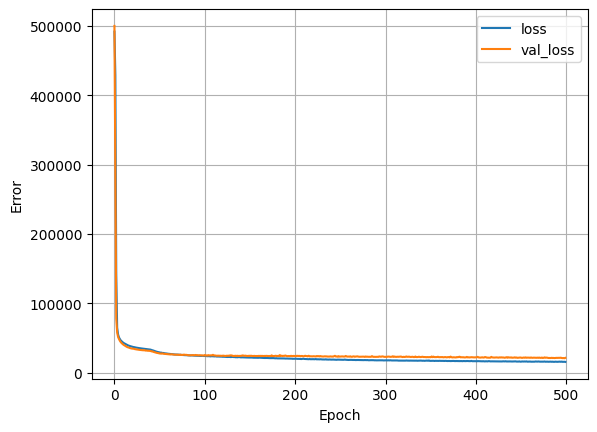

In [29]:
history = histories[0]

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
ax = plt.gca()
#ax.set_ylim([0, 120000])
plt.legend()
plt.grid(True)

In [8]:
model.evaluate(X_test, Y_test, verbose=0)

14577.83984375

In [29]:
models[1].save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model/assets


INFO:tensorflow:Assets written to: dnn_model/assets


In [10]:
print(model.get_metrics_result())

{'loss': <tf.Tensor: shape=(), dtype=float32, numpy=14577.84>}


In [16]:
for model in models:
    print(model.evaluate(X_test, Y_test, verbose=0))

30995.25390625
48272.12109375
26033.08203125
41883.08984375
